In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
from scipy.optimize import curve_fit


In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [17]:
nltk.download('stopwords')
stopwords_default = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
len(stopwords_default)

179

In [2]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay

In [31]:
ls

book_no_10_stop_words.txt
book_no_20_stop_words.txt
book_no_30_stop_words.txt
book_shuffled_stop_words_entire_english_vocabulary.txt
book_stop_words_entire_english_vocabulary.txt
book.txt
FILTER_STOP_WORDS.ipynb
nov_book_no_10_stop_words.txt
nov_book_no_20_stop_words.txt
nov_book_no_30_stop_words.txt
nov_book_no_stop_words_eng.txt
nov_book_shuff_no_stop_words_eng.txt
nov_book.txt
nov_FILTER_STOP_WORDS.ipynb
novs.sh*
nov_Untitled.ipynb
Untitled.ipynb


In [5]:
novs_10_st_word = np.loadtxt('nov_book_no_10_stop_words.txt')
novs_20_st_word = np.loadtxt('nov_book_no_20_stop_words.txt')
novs_30_st_word = np.loadtxt('nov_book_no_30_stop_words.txt')

In [21]:
novs_full_voc_st_word = np.loadtxt('nov_book_no_stop_words_eng.txt')

In [35]:
novs_shuff_full_voc_st_word = np.loadtxt('nov_book_shuff_no_stop_words_eng.txt')

In [7]:
delay_10 = delays(novs_10_st_word,True)
delay_20 = delays(novs_20_st_word,True)
delay_30 = delays(novs_30_st_word,True)

In [22]:
delay_full = delays(novs_full_voc_st_word,True)

In [36]:
delay_shuff = delays(novs_shuff_full_voc_st_word,True)

In [42]:
delay_10_no_log = delays(novs_10_st_word,False)
delay_20_no_log = delays(novs_20_st_word,False)
delay_30_no_log = delays(novs_30_st_word,False)
delay_full_no_log = delays(novs_full_voc_st_word,False)
delay_full_no_log_shuff = delays(novs_shuff_full_voc_st_word,False)

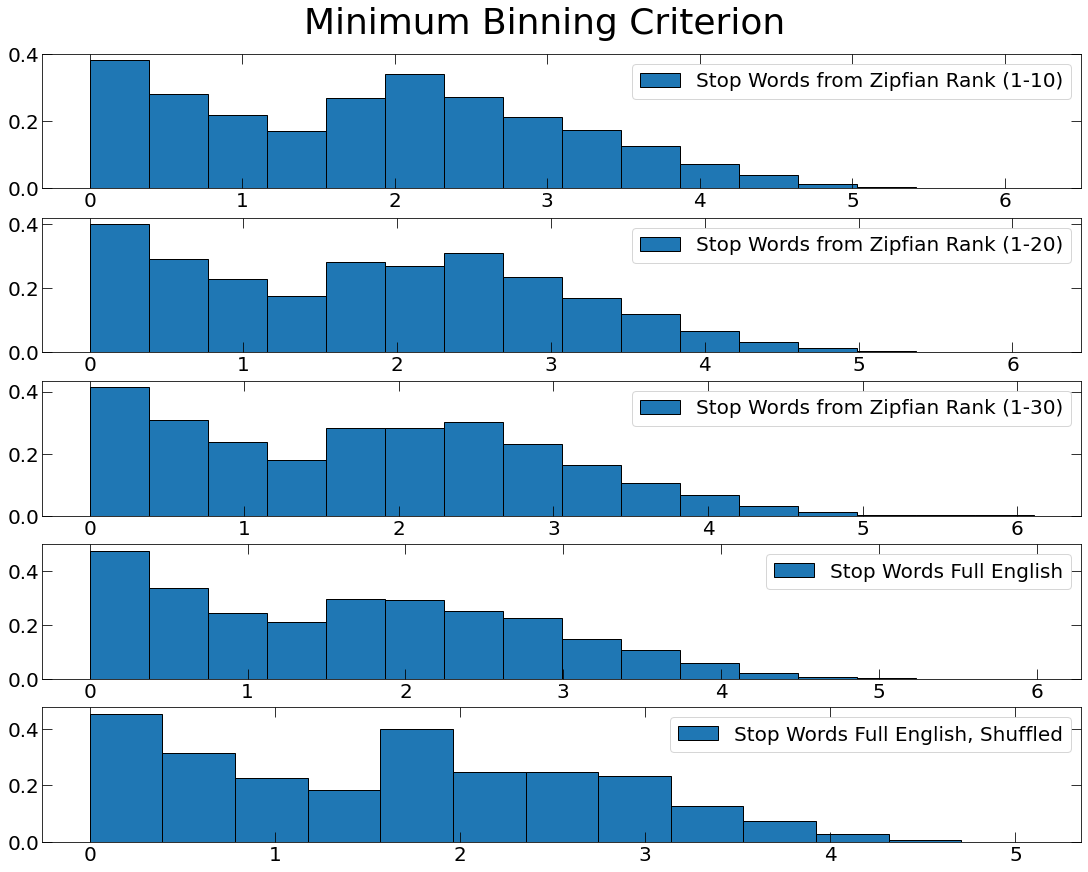

In [41]:
fig, axs = plt.subplots(5,figsize=(15,12),constrained_layout=True)
fig.suptitle(r'Minimum Binning Criterion',fontsize=36)

axs[0].hist(delay_10,density=True,bins=16,edgecolor='black',label = 'Stop Words from Zipfian Rank (1-10)')
axs[0].xaxis.set_tick_params(labelsize=20)
axs[0].yaxis.set_tick_params(labelsize=20)
axs[0].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
#axs[0].set_ylim([0,0.13])
axs[0].legend(fontsize="20" )



axs[1].hist(delay_20,density=True,edgecolor='black',bins=16,label = 'Stop Words from Zipfian Rank (1-20)')
axs[1].xaxis.set_tick_params(labelsize=20)
axs[1].yaxis.set_tick_params(labelsize=20)
axs[1].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
#axs[1].set_ylim([0,0.13])
axs[1].legend(fontsize="20" )




axs[2].hist(delay_30,edgecolor='black',density=True,bins=16,label = 'Stop Words from Zipfian Rank (1-30)')
axs[2].xaxis.set_tick_params(labelsize=20)
axs[2].yaxis.set_tick_params(labelsize=20)
axs[2].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
#axs[2].set_xlim([])
#axs[2].set_ylim([0,0.13])
axs[2].legend(fontsize="20" )

axs[3].hist(delay_full,edgecolor='black',density=True,bins=16,label = 'Stop Words Full English')
axs[3].xaxis.set_tick_params(labelsize=20)
axs[3].yaxis.set_tick_params(labelsize=20)
axs[3].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
#axs[2].set_xlim([])
#axs[2].set_ylim([0,0.13])
axs[3].legend(fontsize="20" )

axs[4].hist(delay_shuff,edgecolor='black',density=True,bins=13,label = 'Stop Words Full English, Shuffled')
axs[4].xaxis.set_tick_params(labelsize=20)
axs[4].yaxis.set_tick_params(labelsize=20)
axs[4].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
#axs[2].set_xlim([])
#axs[2].set_ylim([0,0.13])
axs[4].legend(fontsize="20" )

plt.show()

In [27]:
def mixed_ddp(delays_,junction,n_bins,width):
    logged_delays_ = np.log(delays_)
    norm = len(logged_delays_)
    unique_before_junction = np.unique(np.array([i for i in logged_delays_ if i<=junction]),return_counts=True)
    unique_before_junction[0][-1]= unique_before_junction[0][-1]-width/2
    unique_after_junction = np.unique(np.array([i for i in logged_delays_ if i>junction]),return_counts=True)
    delta = (unique_after_junction[0][0]-junction)/2
    bin_width = (np.max(unique_after_junction[0])-junction+delta)/n_bins
    bins = np.ones(n_bins)*(junction+delta) + np.arange(0,n_bins)*bin_width
    frequencies_before = unique_before_junction[1]/norm
    frequencies_after = np.zeros(len(bins)-1)
    dict_values = {}
    
    for idx,i in enumerate(unique_after_junction[0]):
        dict_values[i]=unique_after_junction[1][idx] 
    
    for idx,i in enumerate(bins[:-1]):
        for j in dict_values:
            if (j<bins[idx+1] and j>=i):
                frequencies_after[idx]+=dict_values[j]/(norm)
    return np.array([unique_before_junction[0],frequencies_before]),np.array([bins,frequencies_after])

In [47]:
def mixed_ddp(delays_,junction,n_bins,upper_bound,width):
    logged_delays_ = np.log(delays_)
    norm = len(logged_delays_)
    unique_before_junction = np.unique(np.array([i for i in logged_delays_ if i<=junction]),return_counts=True)
    unique_before_junction[0][-1]= unique_before_junction[0][-1]-width/2
    unique_after_junction = np.unique(np.array([i for i in logged_delays_ if i>junction]),return_counts=True)
    delta = (unique_after_junction[0][0]-junction)/2
    bin_width = (upper_bound-junction+delta)/n_bins
    bins = np.ones(n_bins)*(junction+delta) + np.arange(0,n_bins)*bin_width
    frequencies_before = unique_before_junction[1]/norm
    frequencies_after = np.zeros(len(bins)-1)
    dict_values = {}
    
    for idx,i in enumerate(unique_after_junction[0]):
        dict_values[i]=unique_after_junction[1][idx] 
    
    for idx,i in enumerate(bins[:-1]):
        for j in dict_values:
            if (j<bins[idx+1] and j>=i):
                frequencies_after[idx]+=dict_values[j]/(norm)
    return np.array([unique_before_junction[0],frequencies_before]),np.array([bins,frequencies_after])

/tmp/ipykernel_20986/2735814757.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([unique_before_junction[0],frequencies_before]),np.array([bins,frequencies_after])


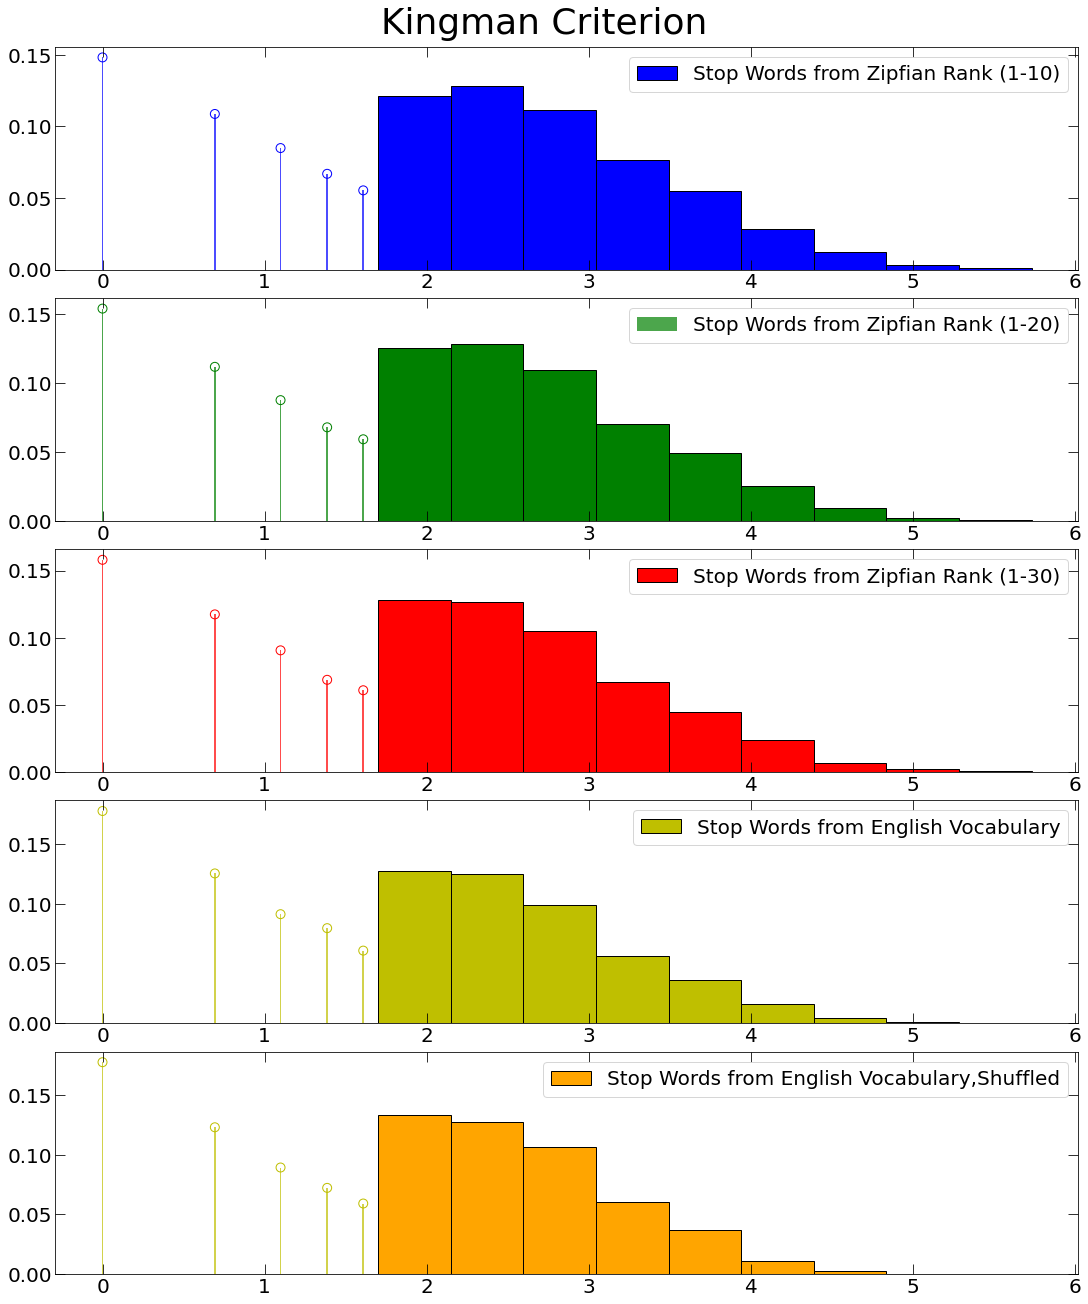

In [48]:
a_10,b_10 = mixed_ddp(delay_10_no_log,np.log(5),10,6,0.001)
a_20,b_20 = mixed_ddp(delay_20_no_log,np.log(5),10,6,0.001)
a_30,b_30 = mixed_ddp(delay_30_no_log,np.log(5),10,6,0.001)
a_full,b_full = mixed_ddp(delay_full_no_log,np.log(5),10,6,0.001)
a_shuff,b_shuff = mixed_ddp(delay_full_no_log_shuff,np.log(5),10,6,0.001)

fig, axs = plt.subplots(5,figsize=(15,18),constrained_layout=True)
fig.suptitle(r'Kingman Criterion',fontsize=36)
axs[0].scatter(a_10[0],a_10[1], s=80, facecolors='none', edgecolors='blue')
axs[0].bar(a_10[0],a_10[1], width=0.01, align='center', color='blue', alpha=0.7)
axs[0].bar(b_10[0][:-1], b_10[1],width=np.diff(b_10[0]), align='edge',edgecolor='black' ,color='blue',label='Stop Words from Zipfian Rank (1-10)')
axs[0].xaxis.set_tick_params(labelsize=20)
axs[0].yaxis.set_tick_params(labelsize=20)
#axs[0].set_xlim([0,8])
#axs[0].set_ylim([0,8])
axs[0].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[0].legend(fontsize="20" )

axs[1].scatter(a_20[0],a_20[1], s=80, facecolors='none', edgecolors='g')
axs[1].bar(a_20[0],a_20[1], width=0.01, align='center', color='green', alpha=0.7,label='Stop Words from Zipfian Rank (1-20)')
axs[1].bar(b_20[0][:-1], b_20[1],width=np.diff(b_20[0]), align='edge',edgecolor='black' ,color='green')
axs[1].xaxis.set_tick_params(labelsize=20)
axs[1].yaxis.set_tick_params(labelsize=20)
axs[1].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[1].legend(fontsize="20" )

axs[2].scatter(a_30[0],a_30[1], s=80, facecolors='none', edgecolors='r')
axs[2].bar(a_30[0],a_30[1], width=0.01, align='center', color='red', alpha=0.7)
axs[2].bar(b_30[0][:-1], b_30[1],width=np.diff(b_30[0]), align='edge',edgecolor='black' ,color='red',label='Stop Words from Zipfian Rank (1-30)')
axs[2].xaxis.set_tick_params(labelsize=20)
axs[2].yaxis.set_tick_params(labelsize=20)
axs[2].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[2].legend(fontsize="20" )

axs[3].scatter(a_full[0],a_full[1], s=80, facecolors='none', edgecolors='y')
axs[3].bar(a_full[0],a_full[1], width=0.01, align='center', color='y', alpha=0.7)
axs[3].bar(b_full[0][:-1], b_full[1],width=np.diff(b_full[0]), align='edge',edgecolor='black' ,color='y',label='Stop Words from English Vocabulary')
axs[3].xaxis.set_tick_params(labelsize=20)
axs[3].yaxis.set_tick_params(labelsize=20)
axs[3].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[3].legend(fontsize="20" )

axs[4].scatter(a_shuff[0],a_shuff[1], s=80, facecolors='none', edgecolors='y')
axs[4].bar(a_shuff[0],a_shuff[1], width=0.01, align='center', color='y', alpha=0.7)
axs[4].bar(b_shuff[0][:-1], b_shuff[1],width=np.diff(b_shuff[0]), align='edge',edgecolor='black' ,color='orange',label='Stop Words from English Vocabulary,Shuffled')
axs[4].xaxis.set_tick_params(labelsize=20)
axs[4].yaxis.set_tick_params(labelsize=20)
axs[4].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[4].legend(fontsize="20" )

plt.show()